<a href="https://colab.research.google.com/github/ProtossDragoon/CO-Models-LAB/blob/master/CV/Darknet/YOLOv2in_Colab_janghoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Google Drive 연결

In [1]:
# 구글 드라이브 연결 (YOLO를 사용할 수 있게 구글 드라이브에 darknet을 설치합니다)
# 사용법을 잘 모르겠는 사람은 구글에서 검색해서 따라해보세요.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Install linux dependencies to colab session

In [2]:
!apt-get update
!apt-get upgrade

!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

!apt-get install libavcodec-dev libavformat-dev libswscale-d

!apt-get install libopencv-dev

!apt install g++-5
!apt install gcc-5

!apt update
!apt upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [83.6 kB]
Err:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages
  File has unexpected size (83113 != 83599). Mirror sync in progress? [IP: 99.86.33.117 443]
  Hashes of expected file:
   - Filesize:83599 [weak]
 

## [only once] Install Darknet

In [0]:
# 구글 드라이브에 darknet을 설치하고 검출 예제를 실행합니다.
# 시간이 10분 이상 소요되며, YOLO 검출 결과 영상이 나오면 잘 설치된 것입니다.
# version : AlexeyAB : https://github.com/AlexeyAB/darknet

%cd /content/gdrive/"My Drive"
!git clone https://github.com/AlexeyAB/darknet

!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

/content/gdrive/My Drive
Cloning into 'darknet'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 12515 (delta 16), reused 16 (delta 7), pack-reused 12472
Receiving objects: 100% (12515/12515), 11.73 MiB | 6.46 MiB/s, done.
Resolving deltas: 100% (8476/8476), done.
Checking out files: 100% (1983/1983), done.
'문글07조 (PBL03).gdoc'
 2018겨울일본여행.gdoc
'2019 2월 Laon LT 예산 부산 양산.gsheet'
'2019 LAON 2월 LT.gdoc'
'48초 걸리는 설문.gform'
'스르릉AM 사업계획서 (Compact).gdoc'
'스르릉AM 사업계획서 (Full).gdoc'
'스르릉AM 발표대본 및 피드백.gdoc'
'Anyfile Notepad Files'
'Colab Notebooks'
'스르릉 사업계획서 (Compact).gdoc'
 darkflow
 darknet
 darknet_weight_backup
'Doc Jan 24 2020 (1).pdf'
'Doc Jan 24 2020.pdf'
'스르릉 사업계획서 (Full).gdoc'
'앱 공모전   공연예술톤 회의록.gdoc'
 개수.gdoc
'날씨   농림축산 공모전 회의록.gdoc'
'랑카위 여해

## Dwonload pretrained weight

### [only once] Download weight : yolov3

In [0]:
%cd /content/gdrive/"My Drive"/darknet
!wget https://pjreddie.com/media/files/yolov3.weights
!make

## Run Demo

### Run Demo Image

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130
/content/gdrive/My Drive/darknet
 OpenCV isn't used 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Laye

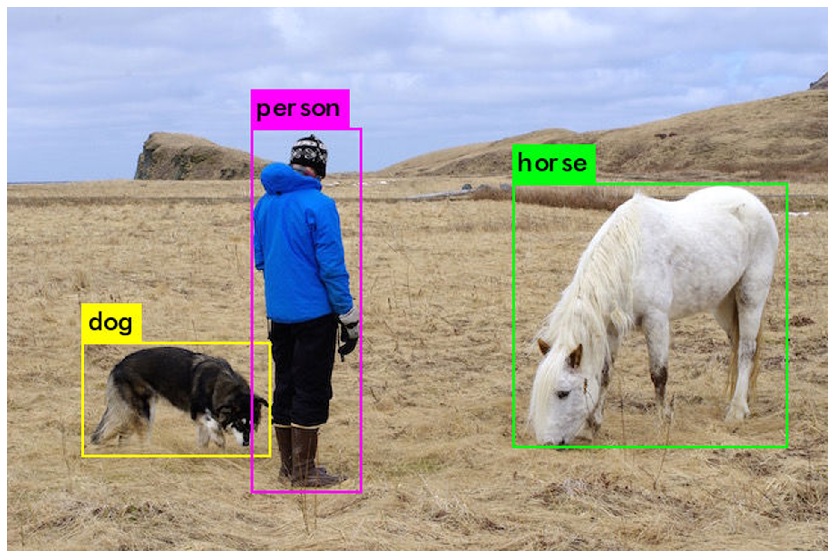

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)
print("'sup!'")


!/usr/local/cuda/bin/nvcc --version

# 디렉터리 이동
%cd /content/gdrive/"My Drive"/darknet
!rm predictions.jpg

# 실행권한 부여
!chmod u+x ./darknet

# 실행 명령
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)
  
# 실행의 결과물 파일을 보여줌
imShow('predictions.jpg')

# Train Custom Dataset


https://github.com/AlexeyAB/darknet/tree/47c7af1cea5bbdedf1184963355e6418cb8b1b4f#how-to-train-to-detect-your-custom-objects


## Training model : tiny-yolo v1

pre-trained weights for convolution layers

### [only once] Gun Dataset

In [0]:
# Dwonload / Upload dataset
# Gun dataset settting
# upload gun dataset 'zip file' to google colab

%cd /content/gdrive/"My Drive"/darknet/data/customdata
!rm -r gundata
!mkdir gundata

!unzip images_and_labels.zip -d /content/gdrive/"My Drive"/darknet/data/customdata/gundata
!ls

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/gdrive/My Drive/darknet/data/customdata/gundata/images_and_labels/armas (145).jpg  
  inflating: /content/gdrive/My Drive/darknet/data/customdata/gundata/images_and_labels/armas (145).txt  
  inflating: /content/gdrive/My Drive/darknet/data/customdata/gundata/images_and_labels/armas (1450).jpg  
  inflating: /content/gdrive/My Drive/darknet/data/customdata/gundata/images_and_labels/armas (1450).txt  
  inflating: /content/gdrive/My Drive/darknet/data/customdata/gundata/images_and_labels/armas (1451).jpg  
  inflating: /content/gdrive/My Drive/darknet/data/customdata/gundata/images_and_labels/armas (1451).txt  
  inflating: /content/gdrive/My Drive/darknet/data/customdata/gundata/images_and_labels/armas (1452).jpg  
  inflating: /content/gdrive/My Drive/darknet/data/customdata/gundata/images_and_labels/armas (1452).txt  
  inflating: /content/gdrive/My Drive/darknet/data/customdata/gundata/images_and_labels/armas (1453).jpg  
  i

### [only once] Get pretrained weight

In [0]:
# Download default weights file for tiny-yolo-voc: http://pjreddie.com/media/files/tiny-yolo-voc.weights
# but not work, so find yourself!

# download from here! https://pjreddie.com/darknet/yolov2/

%cd /content/gdrive/"My Drive"/darknet/weights

/content/gdrive/My Drive/darknet/weights
--2020-02-21 05:19:41--  http://pjreddie.com/media/files/tiny-yolo-voc.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/tiny-yolo-voc.weights [following]
--2020-02-21 05:19:41--  https://pjreddie.com/media/files/tiny-yolo-voc.weights
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-02-21 05:19:42 ERROR 404: Not Found.



In [4]:
# darknet partial cfg/tiny-yolo-voc.cfg tiny-yolo-voc.weights tiny-yolo-voc.conv.13 13
# 이 명령어를 수행하면, tiny-yolo-voc.weights 에서 cfg/tiny-yolo-voc.cfg 의 13번째 conv layer 까지만의 정보를 담고 있는
# 새로운 가중치 파일을 생성함. 

%cd /content/gdrive/"My Drive"/darknet
!./darknet partial cfg/tiny-yolo-voc.cfg weights/yolov2-tiny-voc.weights weights/yolov2-tiny-voc.conv.13 13

/content/gdrive/My Drive/darknet
 OpenCV isn't used 
batch = 8, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
  10 conv    512       3 x 3/ 1     13 x 

### [only once] Prepare filename text

In [0]:
# make yourself!

### [only once] Set checkpoint

In [0]:
# AlexeyAB 의 Darknet 같은 경우에는 아직 어떻게 하는지 모르겠음.

### [only once] Training Start

In [0]:
%cd /content/gdrive/"My Drive"/darknet
%ls

# pretrained model 적용시
!./darknet detector train data/customdata/gundata/obj-gundetection.data cfg/yolov2-tiny-voc-gundetection.cfg weights/yolov2-tiny-voc.conv.13

# pretrained model 적용 안할시
# !./darknet detector train data/customdata/gundata/obj-gundetection.data cfg/yolov2-tiny-voc-gundetection.cfg

/content/gdrive/My Drive/darknet
3rdparty/     CMakeLists.txt          image_yolov3.sh        README.md
appveyor.yml  custom/                 include/               results/
backup/       darknet*                json_mjpeg_streams.sh  scripts/
build/        DarknetConfig.cmake.in  LICENSE                src/
build.ps1     darknet.py              Makefile               video_v2.sh
build.sh      darknet_video.py        net_cam_v3.sh          video_yolov3.sh
cfg/          data/                   obj/                   weights/
cmake/        image_yolov2.sh         predictions.jpg        yolov3.weights
 OpenCV isn't used 
yolov2-tiny-voc-gundetection
batch = 32, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 B

Unzip Data &
Split train / validation dataset

In [0]:
!rm /contect/darknet/backup -r
!ln -s /content/drive/'My Drive'/darknet_weight_backup/tiny-yolo-v1_weight/